# Application 1: Heart Disease Detection

Predict the health condition of the patient. 

Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, metrics 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv('processed.cleveland.csv', header=None, names=columns)

14 attributes used:
    
1. age: age in years
    
2. sex: sex (1 = male; 0 = female)

3. cp: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 

5. chol: serum cholestoral in mg/dl

6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg: resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment( 1 = upsloping, 2 = flat, 3 = downsloping )

12.ca: number of major vessels (0-3) colored by flourosopy

13.thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.num: the predicted attribute

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# look for NaN values in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [5]:
# preprocessing

# Update NaN values with mean of the respective column values
data['ca'] = data.ca.fillna(data.ca.mean())
data['thal'] = data.thal.fillna(data.thal.mean())

# If the goal field is < 2, we treat that the sample belongs to a healthy person.
data['num'] = data.num.map({0: 0, 1: 0, 2: 1, 3: 1, 4: 1})

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
data['num'].value_counts()

0    219
1     84
Name: num, dtype: int64

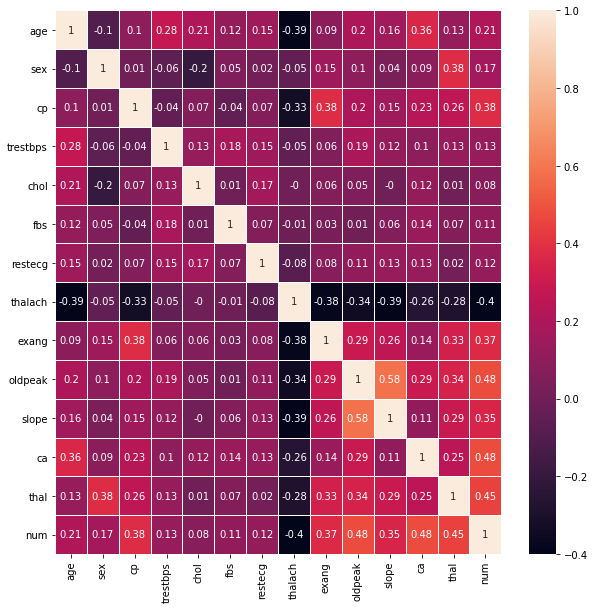

In [8]:
# Correlation matrix measures the linear relationships between the variables
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)
plt.show()

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Normalize features
X = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
data.columns[0:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [11]:
classifiers = []

lr_classifier = LogisticRegression()
classifiers.append(lr_classifier)
lda_classifier = LinearDiscriminantAnalysis()
classifiers.append(lda_classifier)
sv_classifier = SVC()
classifiers.append(sv_classifier)
kn_classifier = KNeighborsClassifier()
classifiers.append(kn_classifier)
gnb_classifier = GaussianNB()
classifiers.append(gnb_classifier)
xgb_classifier = XGBClassifier(eval_metric='logloss')
classifiers.append(xgb_classifier)

In [12]:
for classifier in classifiers:
    print(type(classifier))
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
    print("Precision:",metrics.precision_score(Y_test, y_pred))
    print("Recall:",metrics.recall_score(Y_test, y_pred))
    print("----")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.8351648351648352
Precision: 0.7272727272727273
Recall: 0.64
----
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Accuracy: 0.8351648351648352
Precision: 0.7083333333333334
Recall: 0.68
----
<class 'sklearn.svm._classes.SVC'>
Accuracy: 0.8461538461538461
Precision: 0.6896551724137931
Recall: 0.8
----
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 0.8241758241758241
Precision: 0.68
Recall: 0.68
----
<class 'sklearn.naive_bayes.GaussianNB'>
Accuracy: 0.8241758241758241
Precision: 0.6551724137931034
Recall: 0.76
----
<class 'xgboost.sklearn.XGBClassifier'>
Accuracy: 0.8241758241758241
Precision: 0.6666666666666666
Recall: 0.72
----


### Decision Tree Classifier

In [13]:
dt_classifier = DecisionTreeClassifier(criterion='gini', 
                                       splitter='best', 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_features=None, 
                                       random_state=None, 
                                       max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, 
                                       class_weight=None, 
                                       ccp_alpha=0.0
                                      )


**criterion {“gini”, “entropy”}**
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**splitter {“best”, “random”}**
The strategy used to choose the split at each node. 

**max_depth**
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure 
or until all leaves contain less than min_samples_split samples.

**min_samples_split**
The minimum number of samples required to split an internal node.

**min_samples_leaf**
The minimum number of samples required to be at a leaf node. 
A split point at any depth will only be considered 
if it leaves at least min_samples_leaf training samples in each of the left and right branches.

**min_weight_fraction_leaf**
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
Samples have equal weight when sample_weight is not provided.

**max_features**

The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=sqrt(n_features).
  - If “sqrt”, then max_features=sqrt(n_features).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.

**random_state**
- Controls the randomness of the estimator. 
- The features are always randomly permuted at each split, even if splitter is set to "best".
- When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. 
- But the best found split may vary across different runs, even if max_features=n_features. 
- That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. 
- To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 

**max_leaf_nodes**
- Grow a tree with max_leaf_nodes in best-first fashion. 
- Best nodes are defined as relative reduction in impurity. 
- If None then unlimited number of leaf nodes.

**min_impurity_decrease**
- A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**class_weight**
- Weights associated with classes in the form {class_label: weight}. 
- If None, all classes are supposed to have weight one. 

**ccp_alpha**
- Complexity parameter used for Minimal Cost-Complexity Pruning. 
- The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 
- By default, no pruning is performed. 

In [14]:
dt_classifier.fit(X_train, Y_train)

# Root
# Visualize the tree
# Depth of the tree?
# Gini Index of nodes?

DecisionTreeClassifier()

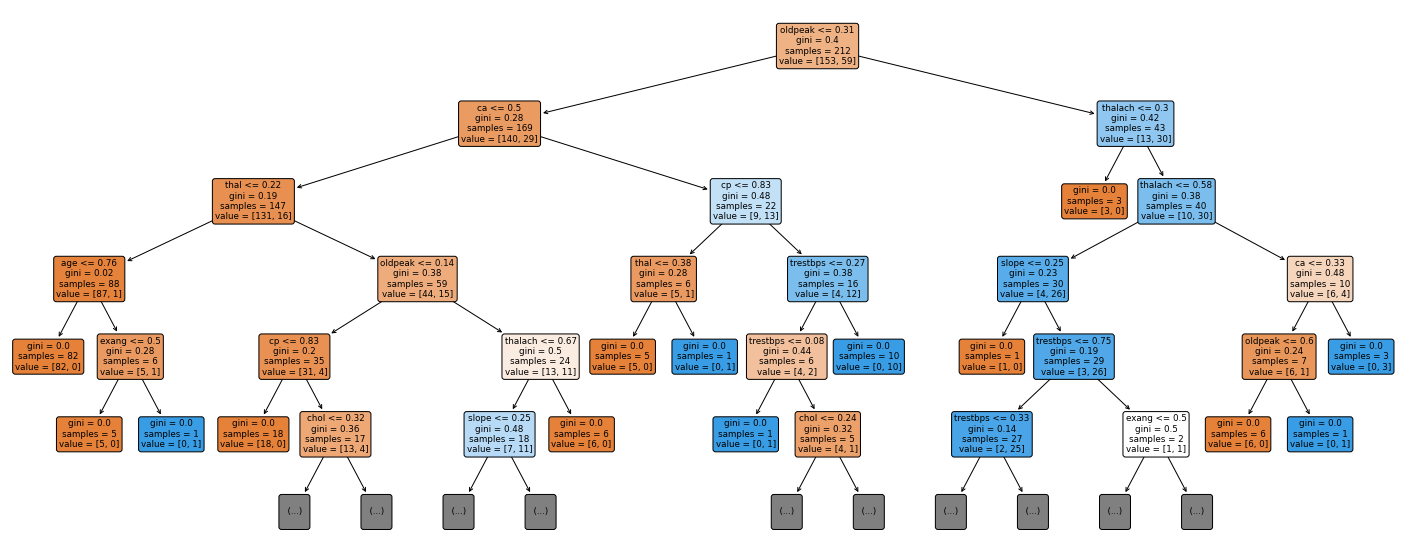

In [15]:
fig = plt.figure(figsize=(25,10))
plot_tree(dt_classifier, 
          max_depth = 5,
          feature_names = data.columns[0:-1],
          rounded = True, 
          precision = 2,
          filled = True)
plt.show()

In [16]:
y_pred = dt_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.7912087912087912
Precision: 0.6363636363636364
Recall: 0.56


In [17]:
# fig.savefig("decision_tree.png")

In [18]:
dt_classifier.classes_

array([0, 1], dtype=int64)

In [19]:
dt_classifier.n_classes_

2

In [20]:
dt_classifier.n_outputs_

1

In [21]:
dt_classifier.feature_importances_

array([0.0331816 , 0.        , 0.06385322, 0.10228451, 0.0616599 ,
       0.01174255, 0.        , 0.11469316, 0.03131347, 0.31689459,
       0.0379822 , 0.15789441, 0.06850039])

In [22]:
dt_classifier.max_features_

13

## Random Forest

In [23]:
### Random Forest

In [24]:
# How may trees were build?
# Can we see those trees?
# How many columns were chosen to decide the root node in those trees?

# Bagging =  Bootstrapping + Aggregation
# Out-of-the-bag Dataset

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, 
                                       criterion='gini', 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_features='auto', 
                                       max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, 
                                       min_impurity_split=None, 
                                       bootstrap=True, 
                                       oob_score=False, 
                                       n_jobs=None, 
                                       random_state=None, 
                                       verbose=0, 
                                       warm_start=False, 
                                       class_weight=None, 
                                       ccp_alpha=0.0, 
                                       max_samples=None)
classifiers.append(rf_classifier)


**n_estimators**
- The number of trees in the forest.

**min_impurity_split**
- Threshold for early stopping in tree growth. 
- A node will split if its impurity is above the threshold, otherwise it is a leaf.

**bootstrap**
- Whether bootstrap samples are used when building trees. 
- If False, the whole dataset is used to build each tree.

**oob_scorebool**
- Whether to use out-of-bag samples to estimate the generalization score. 
- Only available if bootstrap=True.

**n_jobs**
- The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees.

**warm_start**
- When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

In [26]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [27]:
y_pred = rf_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8131868131868132
Precision: 0.6666666666666666
Recall: 0.64


In [28]:
# Extract single tree
estimator = rf_classifier.estimators_[0]

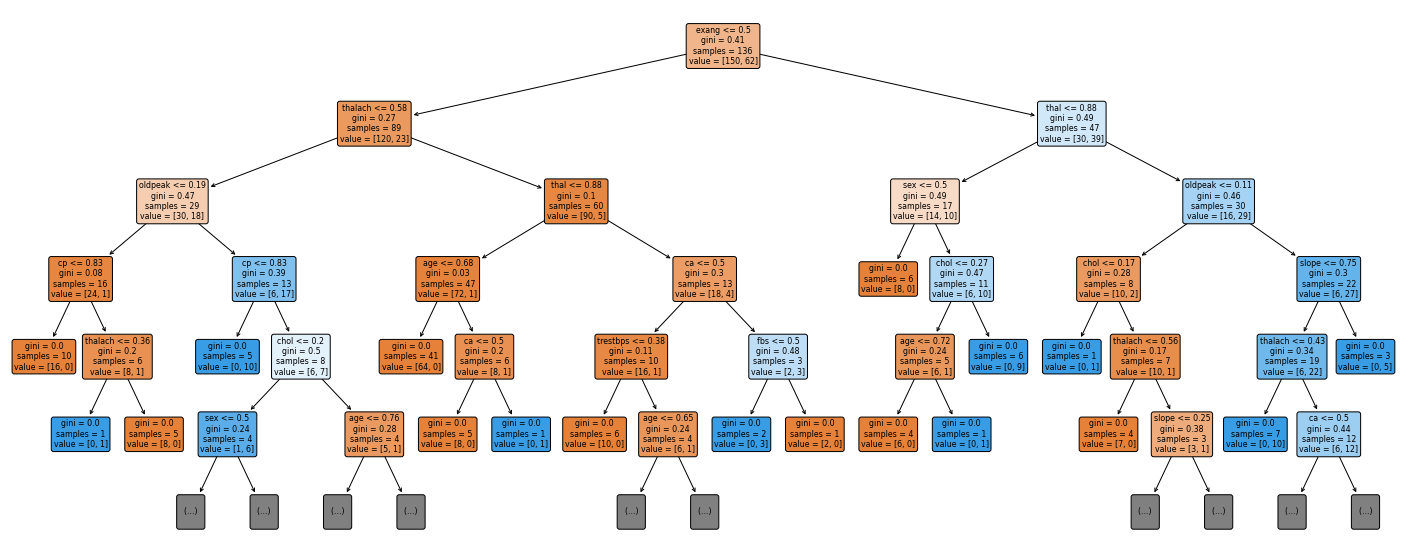

In [29]:
fig = plt.figure(figsize=(25,10))
plot_tree(estimator, 
          max_depth = 5,
          feature_names = data.columns[0:-1],
          rounded = True, 
          precision = 2,
          filled = True)
plt.show()

In [30]:
# Extract single tree
estimator = rf_classifier.estimators_[1]

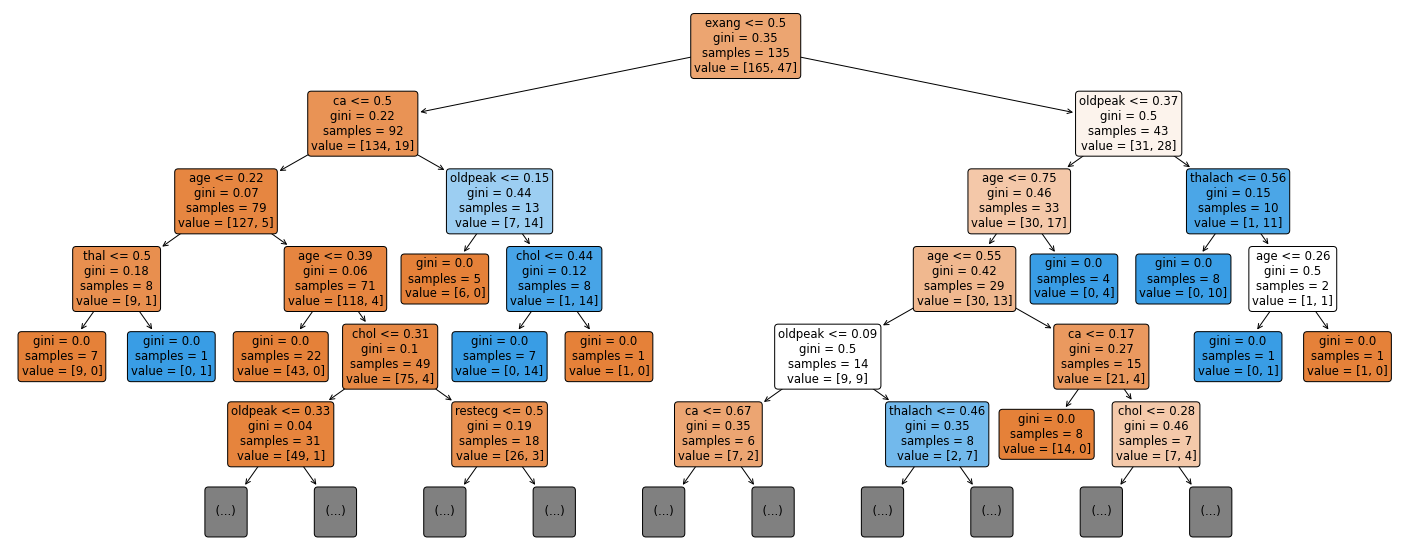

In [31]:
fig = plt.figure(figsize=(25,10))
plot_tree(estimator, 
          max_depth = 5,
          feature_names = data.columns[0:-1],
          rounded = True, 
          precision = 2,
          filled = True)
plt.show()